<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 131.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 152.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 173.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 154.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 166.9 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_299/2979994083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = industry_distribution.index , y= industry_distribution.values, palette ='viridis')


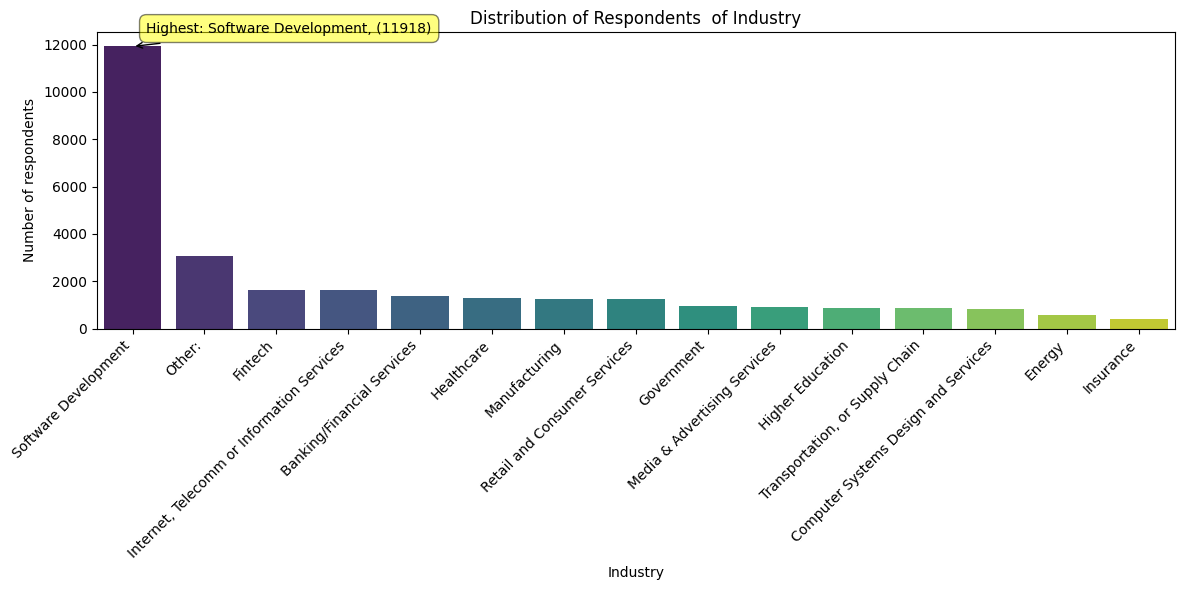

In [21]:
##Write your code here
industry_distribution = df['Industry'].value_counts()

plt.figure(figsize = (12,6))
sns.barplot(x = industry_distribution.index , y= industry_distribution.values, palette ='viridis')
plt.title("Distribution of Respondents  of Industry") 
plt.xlabel('Industry') 
plt.ylabel('Number of respondents') 
plt.xticks(rotation = 45 , ha ='right') 
#highlight notable trends
max_industry = industry_distribution.idxmax() 
max_count = industry_distribution.max()
plt.annotate(
    f'Highest: {max_industry}, ({max_count})',  # Text to display
    xy=(industry_distribution.index.get_loc(max_industry), max_count),  # Arrow tip position (FIXED: closed parentheses)
    xytext=(10, 10),  # Text position offset
    textcoords='offset points',  # Coordinate system for xytext (FIXED: added comma)
    bbox=dict(boxstyle='round, pad=0.5', fc='yellow', alpha=0.5),  # Yellow rounded box
    arrowprops=dict(arrowstyle='->')  # Arrow style
)
plt.tight_layout()
plt.show()
           

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [39]:
##Write your code here
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].dropna()
mean_comp = df['ConvertedCompYearly'].mean() 
median_comp = df['ConvertedCompYearly'].median() 
std_comp = df['ConvertedCompYearly'].std() 

print(f'Mean compensation: ${mean_comp:,.2f}')
print(f'Median compensation: ${median_comp:,.2f}')
print(f'Standard deviation: ${std_comp:,.2f}')

threshold = 3* std_comp + mean_comp 
print(f"\nThreshold for High Compensation Outliers: {threshold:.2f}")

high_comp_outliers = df[df['ConvertedCompYearly']> threshold] 
print(len(high_comp_outliers)) 
print(high_comp_outliers[['ResponseId', 'ConvertedCompYearly']].sort_values(by ='ConvertedCompYearly', ascending = False))



Mean compensation: $86,155.29
Median compensation: $65,000.00
Standard deviation: $186,756.97

Threshold for High Compensation Outliers: 646426.21
89
       ResponseId  ConvertedCompYearly
15837       15838           16256603.0
12723       12724           13818022.0
28379       28380            9000000.0
17593       17594            6340564.0
17672       17673            4936778.0
...           ...                  ...
13336       13337             660660.0
6735         6736             650000.0
529           530             650000.0
28381       28382             650000.0
28213       28214             650000.0

[89 rows x 2 columns]


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


 Q1 (25 percentile): 32712.00
Q3 (75 percentile: 107971.50
 Lower bound: -80177.25
 Upper bound: 220860.75

 Total outliers
: 978

 High Compensation outliers
: 978


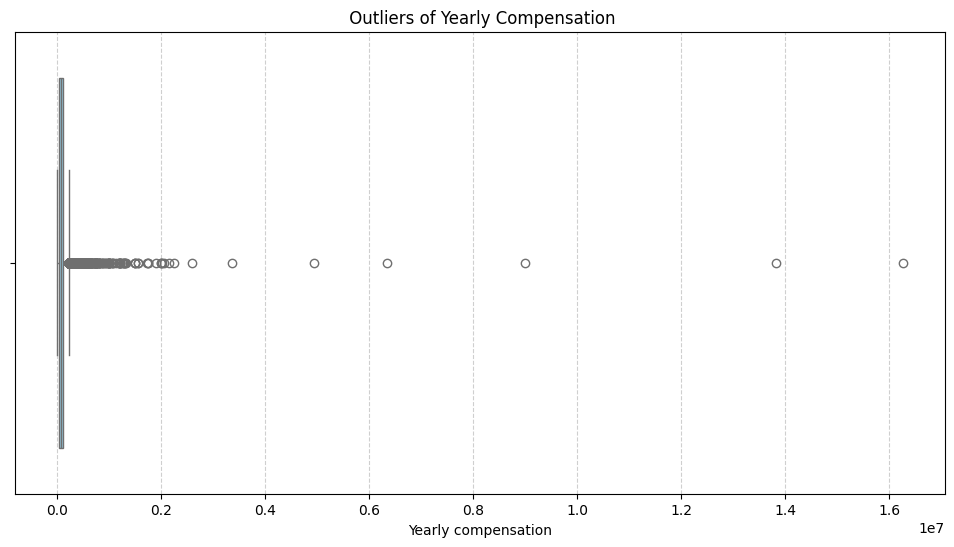

In [53]:
##Write your code here
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75) 
print(f" Q1 (25 percentile): {Q1:.2f}")
print(f"Q3 (75 percentile: {Q2:.2f}") 
IQR = Q3 -Q1

lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR 

print(f" Lower bound: {lower_bound:.2f}") 
print(f" Upper bound: {upper_bound:.2f}") 

outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)] 
high_outliers = df[df['ConvertedCompYearly'] > upper_bound]
print(f"\n Total outliers\n: {len(outliers)}")
print(f"\n High Compensation outliers\n: {len(high_outliers)}") 

plt.figure(figsize = (12,6)) 
sns.boxplot(x= df['ConvertedCompYearly'], color ='skyblue') 
plt.title(" Outliers of Yearly Compensation") 
plt.xlabel("Yearly compensation")
plt.grid(axis ='x', linestyle ='--', alpha =0.6)
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [56]:
##Write your code here
df_cleaned = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print("Cleaned dataframe:", len(df_cleaned))
df_cleaned.reset_index(drop=True, inplace=True)

Cleaned dataframe: 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
ResponseId            NaN
CompTotal             NaN
WorkExp               NaN
JobSatPoints_1        NaN
JobSatPoints_4        NaN
JobSatPoints_5        NaN
JobSatPoints_6        NaN
JobSatPoints_7        NaN
JobSatPoints_8        NaN
JobSatPoints_9        NaN
JobSatPoints_10       NaN
JobSatPoints_11       NaN
ConvertedCompYearly   NaN
JobSat                NaN
AgeMapped             NaN
Name: AgeMapped, dtype: float64


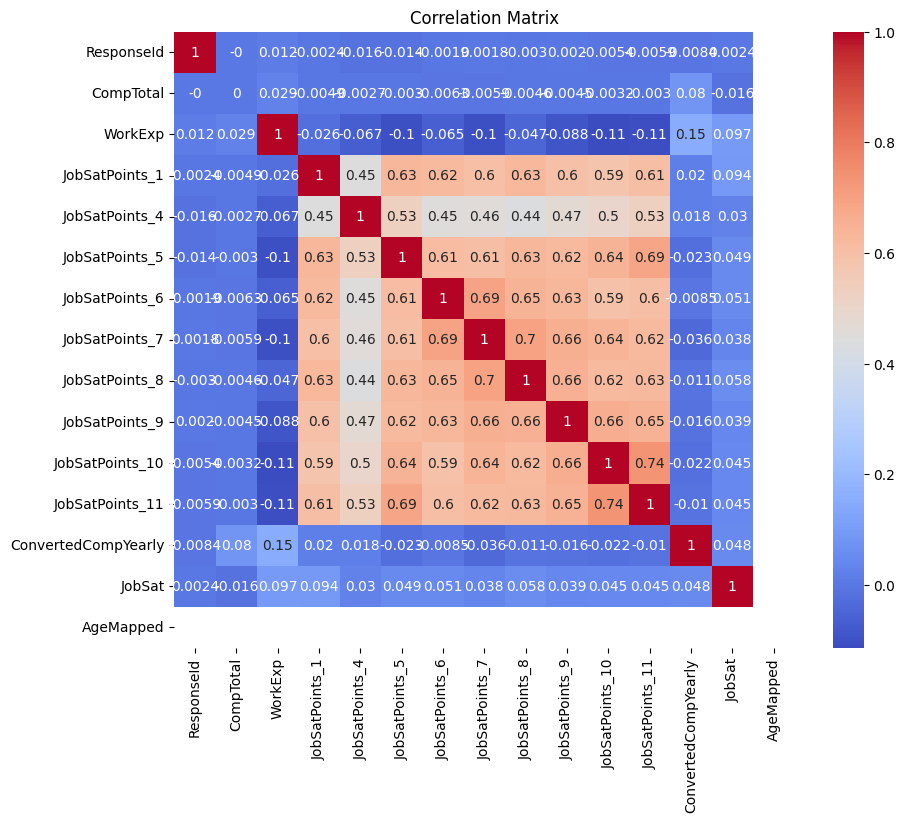

In [61]:
##Write your code here
print(df['Age'].unique())
age_map = {
    'Under 18': 16,
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65 or older': 70
}

df['AgeMapped'] = df['Age'].map(age_map)
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['AgeMapped'])
df['JobSatAvg'] = df[['JobSatPoints_1', 'JobSatPoints_2', ..., 'JobSatPoints_10']].mean(axis=1)%%!

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
